# Final Project Model Training

In [1]:
import pandas as pd
import numpy as np
import streamlit as st
from matplotlib import pyplot as plt # Matplotlib
import datetime
from datetime import datetime

# Package to implement ML Algorithms
import sklearn
from sklearn.tree import DecisionTreeRegressor     # Decision Tree
from sklearn.ensemble import RandomForestRegressor # Random Forest
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import StratifiedKFold

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Import packages to implement Stratified K-fold CV
from sklearn.model_selection import KFold # For creating folds

# Import Package to implement GridSearch CV
from sklearn.model_selection import GridSearchCV

# Importing package for Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

# Package to record time
import time

# Package for Data pretty printer
from pprint import pprint

# Module to save and load Python objects to and from files
import pickle 

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

%matplotlib inline

In [2]:
aqi = pd.read_csv("mlm_aqi_data.csv")
aqi.head()

,State,urban_perc_state,County,percentage20_Donald_Trump,percentage20_Joe_Biden,avg_sal_2022,white_perc,baa_perc,asian_perc,native_perc,pi_perc,his_perc,AQI,CO_perc,NO2_perc,O3_perc,PM2.5_perc,PM10_perc
0,Alabama,0.577,Baldwin,0.762,0.223,56747.0,0.893656,0.094556,0.017246,0.017071,0.002414,0.050362,40,0.0,0.0,0.808511,0.191489,0.0
1,Alabama,0.577,Clay,0.808,0.183,39876.0,0.851035,0.153050,0.004719,0.012326,0.001056,0.031835,27,0.0,0.0,0.000000,1.000000,0.0
2,Alabama,0.577,DeKalb,0.844,0.146,40558.0,0.946637,0.026404,0.007236,0.037126,0.006820,0.159921,37,0.0,0.0,0.925620,0.074380,0.0
3,Alabama,0.577,Elmore,0.736,0.252,49071.0,0.764367,0.230173,0.011433,0.011121,0.001999,0.031799,37,0.0,0.0,1.000000,0.000000,0.0
4,Alabama,0.577,Etowah,0.745,0.242,42951.0,0.825877,0.163812,0.011262,0.015201,0.004152,0.047736,42,0.0,0.0,0.424581,0.575419,0.0


In [3]:
aqi = aqi.fillna(0)

In [4]:
X = aqi.drop(columns= ["AQI"])
y = aqi['AQI']

In [5]:
# One hot encoding for categorical variables
cat_var = ["State", 'County']
X_encoded = pd.get_dummies(X, columns = cat_var)

X_encoded.head()

,urban_perc_state,percentage20_Donald_Trump,percentage20_Joe_Biden,avg_sal_2022,white_perc,baa_perc,asian_perc,native_perc,pi_perc,his_perc,...,County_Wyoming,County_Wythe,County_Yakima,County_Yalobusha,County_Yancey,County_Yavapai,County_Yellowstone,County_Yolo,County_York,County_Yuma
0,0.577,0.762,0.223,56747.0,0.893656,0.094556,0.017246,0.017071,0.002414,0.050362,...,False,False,False,False,False,False,False,False,False,False
1,0.577,0.808,0.183,39876.0,0.851035,0.153050,0.004719,0.012326,0.001056,0.031835,...,False,False,False,False,False,False,False,False,False,False
2,0.577,0.844,0.146,40558.0,0.946637,0.026404,0.007236,0.037126,0.006820,0.159921,...,False,False,False,False,False,False,False,False,False,False
3,0.577,0.736,0.252,49071.0,0.764367,0.230173,0.011433,0.011121,0.001999,0.031799,...,False,False,False,False,False,False,False,False,False,False
4,0.577,0.745,0.242,42951.0,0.825877,0.163812,0.011262,0.015201,0.004152,0.047736,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# Data partitioning into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = 0.2, random_state = 42)

## Random Forest Model

In [7]:
#random forest model
regressor = RandomForestRegressor(random_state = 42)
folds = KFold(n_splits = 3, shuffle = True, random_state = 42)

param_grid = {
    'max_depth': [5, 15, 25, 40, 60],
    'min_samples_leaf': [5, 15, 25, 40, 60, 100],
    'min_samples_split': [5, 15, 25, 40, 60, 100],
    'n_estimators': [40, 60, 100, 200, 300]
    }

#randomized for before hyperparameter tuning
random_cv = RandomizedSearchCV(estimator = regressor,
                              param_distributions = param_grid,
                              n_iter = 100,
                              scoring = 'r2',
                              cv = folds,
                              verbose = 2,
                              random_state = 42,
                              n_jobs = -1)





In [42]:
start = time.time()
random_cv.fit(train_X, train_y)
stop = time.time()            
print(f"Training time: {stop - start}s")
print('Initial score: ', random_cv.best_score_)
print('Initial parameters: ', random_cv.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=5, min_samples_leaf=25, min_samples_split=25, n_estimators=40; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=25, min_samples_split=25, n_estimators=40; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=25, min_samples_split=25, n_estimators=40; total time=   0.3s
[CV] END max_depth=60, min_samples_leaf=40, min_samples_split=40, n_estimators=100; total time=   0.6s
[CV] END max_depth=15, min_samples_leaf=15, min_samples_split=60, n_estimators=60; total time=   0.4s
[CV] END max_depth=60, min_samples_leaf=40, min_samples_split=40, n_estimators=100; total time=   0.5s
[CV] END max_depth=60, min_samples_leaf=40, min_samples_split=40, n_estimators=100; total time=   0.5s
[CV] END max_depth=15, min_samples_leaf=15, min_samples_split=60, n_estimators=60; total time=   0.5s
[CV] END max_depth=15, min_samples_leaf=15, min_samples_split=60, n_estimators=60; total time=   0.5s
[CV] END max_depth=

In [8]:

#generating final model w GridSearchCV()
#'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 40
#'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 180
param_grid = {
    'max_depth': [30],
    'min_samples_leaf': [5],
    'min_samples_split': [5],
    'n_estimators': [180]
    }

model_cv = GridSearchCV(estimator = regressor, 
                        param_grid = param_grid, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1)
start = time.time()

#fitting random forest model
model_cv.fit(train_X, train_y)  
stop = time.time()            
print(f"Training time: {stop - start}s")
print('Improved score: ', model_cv.best_score_)
print('Improved parameters: ', model_cv.best_params_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Training time: 9.455596208572388s
Improved score:  0.6713328215585909
Improved parameters:  {'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 180}


Improved parameters:  {'max_depth': 35, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 190}

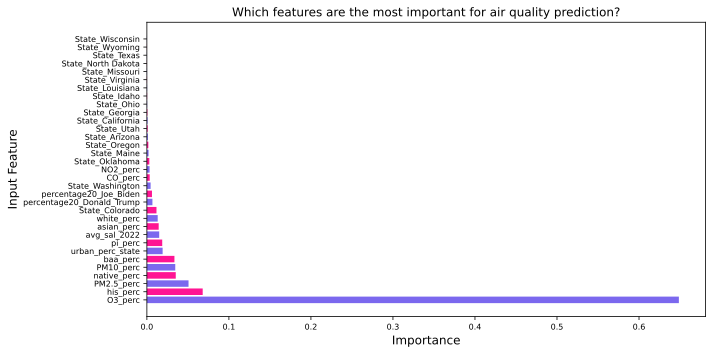

In [9]:
# Storing importance values from the trained model
importance = model_cv.best_estimator_.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)
feature_imp = feature_imp[feature_imp['Importance'] > 0.0001]
# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['mediumslateblue', 'deeppink'])

plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Input Feature", fontsize = 12)
plt.title('Which features are the most important for air quality prediction?', fontsize = 12) 
plt.yticks(fontsize = 8) # fontsize of yticks
plt.xticks(fontsize = 8) # fontsize of xticks
#plt.savefig("rf_feature_imp.svg", bbox_inches="tight")
#plt.savefig("rf_feature_imp.png", bbox_inches="tight")
plt.tight_layout();

In [10]:
# Creating the file where we want to write the model
rf_pickle = open('rf_aqi.pickle', 'wb') 

# Write RF model to the file
pickle.dump(model_cv, rf_pickle) 

# Close the file
rf_pickle.close()

## Decision Tree Model

In [10]:
#random forest model
regressor = DecisionTreeRegressor(random_state = 42)
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

param_grid = {
    'max_depth': [5, 15, 25, 40, 60],
    'min_samples_leaf': [5, 15, 25, 40, 60, 100],
    'min_samples_split': [5, 15, 25, 40, 60, 100]
    }

#randomized for before hyperparameter tuning
random_cv = RandomizedSearchCV(estimator = regressor,
                              param_distributions = param_grid,
                              n_iter = 100,
                              scoring = 'r2',
                              cv = folds,
                              verbose = 2,
                              random_state = 42,
                              n_jobs = -1)




In [57]:

random_cv.fit(train_X, train_y)  
stop = time.time()            
print(f"Training time: {stop - start}s")
print('Initial score: ', random_cv.best_score_)
print('Initial parameters: ', random_cv.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=15; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=15; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=15; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=15, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=15; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=15, min_samples_split=5; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=15, min_samples_split=5; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=15, min_samples_split=5; total time=   0.0s
[CV] END max_depth=60, min_samples_leaf=15, min_samples_split=40; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=15, min_samples_split=5; total time=   0.0s
[CV] END max_depth=60, min_samples_leaf=15, min_samples_split=40; total time=   0.1s
[CV] END ma

In [11]:
#generating final model w GridSearchCV()
#'max_depth': 13, 'min_samples_leaf': 15, 'min_samples_split': 5
param_grid = {
    'max_depth': [13],
    'min_samples_leaf': [15],
    'min_samples_split': [5]
}
model_cv = GridSearchCV(estimator = regressor, 
                        param_grid = param_grid, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1)

#fitting random forest model
start = time.time()
model_cv.fit(train_X, train_y)  
stop = time.time()            
print(f"Training time: {stop - start}s")
print('Improved score: ', model_cv.best_score_)
print('Improved parameters: ', model_cv.best_params_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


Training time: 5.992391109466553s
Improved score:  0.6413983840141738
Improved parameters:  {'max_depth': 13, 'min_samples_leaf': 15, 'min_samples_split': 5}


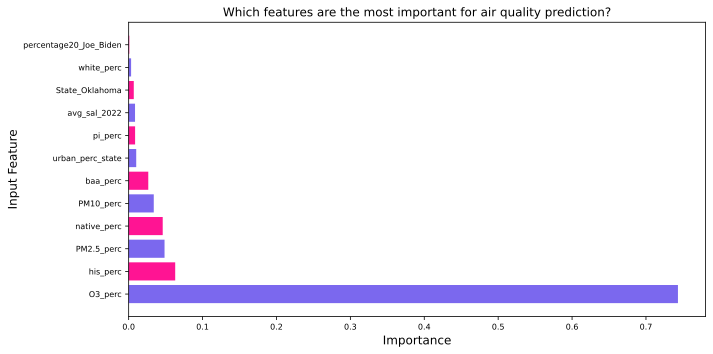

In [12]:
# Storing importance values from the trained model
importance = model_cv.best_estimator_.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)
feature_imp = feature_imp[feature_imp['Importance'] > 0.000001]
# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['mediumslateblue', 'deeppink'])

plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Input Feature", fontsize = 12)
plt.title('Which features are the most important for air quality prediction?', fontsize = 12) 
plt.yticks(fontsize = 8) # fontsize of yticks
plt.xticks(fontsize = 8) # fontsize of xticks
#plt.savefig("dt_feature_imp.svg", bbox_inches="tight")
#plt.savefig("dt_feature_imp.png", bbox_inches="tight")
plt.tight_layout();

In [14]:

# Creating the file where we want to write the model
dt_pickle = open('dt_aqi.pickle', 'wb') 

# Write RF model to the file
pickle.dump(model_cv, dt_pickle) 

# Close the file
dt_pickle.close()


## AdaBoost Model

In [13]:
regressor = AdaBoostRegressor(random_state=42)
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [68]:

n_estimators = [int(x) for x in np.linspace(start = 5, stop = 500, num = 10)]

learning_rate = [x for x in np.arange(0.1, 2.1, 0.1)]

param_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate
}

random_cv = RandomizedSearchCV(estimator = regressor,
                              param_distributions = param_grid,
                              n_iter = 100,
                              scoring = 'r2',
                              cv = folds,
                              verbose = 2,
                              random_state = 42,
                              n_jobs = -1)


In [69]:

random_cv.fit(train_X, train_y)  
stop = time.time()            
print(f"Training time: {stop - start}s")
print('Initial score: ', random_cv.best_score_)
print('Initial parameters: ', random_cv.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ................learning_rate=1.0, n_estimators=280; total time=   2.3s
[CV] END ................learning_rate=1.0, n_estimators=280; total time=   2.6s
[CV] END ................learning_rate=1.0, n_estimators=280; total time=   1.8s
[CV] END ................learning_rate=0.2, n_estimators=280; total time=   1.8s
[CV] END ................learning_rate=0.2, n_estimators=280; total time=   0.7s
[CV] END ................learning_rate=0.2, n_estimators=280; total time=   0.6s
[CV] END ................learning_rate=0.2, n_estimators=280; total time=   1.7s
[CV] END ..................learning_rate=0.4, n_estimators=5; total time=   0.0s
[CV] END ..................learning_rate=0.4, n_estimators=5; total time=   0.0s
[CV] END ..................learning_rate=0.4, n_estimators=5; total time=   0.1s
[CV] END ..................learning_rate=0.4, n_estimators=5; total time=   0.1s
[CV] END ..................learning_rate=0.4, 

In [14]:

#'n_estimators': 5, 'learning_rate': 0.4
#'learning_rate': , 'n_estimators': 
param_grid = {'n_estimators': [6],
               'learning_rate': [0.3]
}

# Call GridSearchCV()
model_cv = GridSearchCV(estimator = regressor, 
                        param_grid = param_grid, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1)

# Fit the model
start = time.time()            # Start Time
model_cv.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")
print('Improved score: ', model_cv.best_score_)
print('Improved parameters: ', model_cv.best_params_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


Training time: 1.4440789222717285s
Improved score:  0.6274757028813611
Improved parameters:  {'learning_rate': 0.3, 'n_estimators': 6}


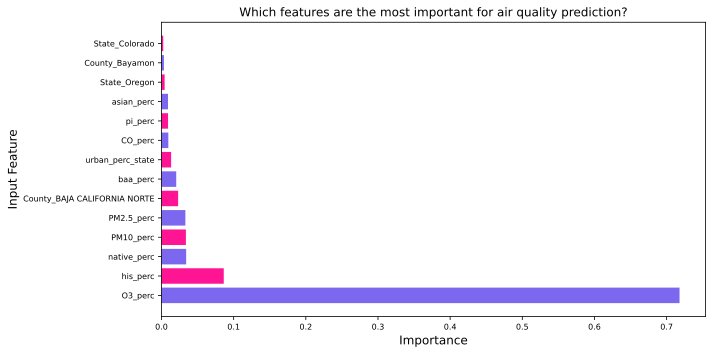

In [16]:

# Storing importance values from the trained model
importance = model_cv.best_estimator_.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)
feature_imp = feature_imp[feature_imp['Importance'] > 0.001]
# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['mediumslateblue', 'deeppink'])

plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Input Feature", fontsize = 12)
plt.title('Which features are the most important for air quality prediction?', fontsize = 12) 
plt.yticks(fontsize = 8) # fontsize of yticks
plt.xticks(fontsize = 8) # fontsize of xticks
#plt.savefig("ad_feature_imp.svg", bbox_inches="tight")
#plt.savefig("ad_feature_imp.png", bbox_inches="tight")
plt.tight_layout();


In [18]:

#saving adaboost model
ad_pickle = open('ad_aqi.pickle', 'wb') 

# Write RF model to the file
pickle.dump(model_cv, ad_pickle) 

# Close the file
ad_pickle.close()
